In [1]:
import os

os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/michael_dev/RA2_alpine_lads/ra_joint_predictions')

In [2]:
from utils.config import Config

config = Config()

In [3]:
from dataset.joint_dataset import feet_joint_dataset

dataset = feet_joint_dataset(config)

feet_joints, feet_joints_val = dataset.create_feet_joints_dataset('../../../training_dataset/training.csv', joints_source = './data/predictions/feet_joint_data_train.csv', val_joints_source = './data/predictions/feet_joint_data_test.csv')

In [4]:
import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np

rate = []

for x, y in feet_joints.take(500):
    y = K.argmax(y, axis = 1).numpy()
    
    non_zero_rate = np.count_nonzero(y) / 64
    
    rate.append(non_zero_rate)

In [5]:
import numpy as np

# 0.95 0.05

print(np.where(rate == np.min(rate))[0].shape[0])
print(np.min(rate))
print(np.mean(rate))
print(np.max(rate))

1
0.296875
0.49359375
0.671875


In [10]:
import numpy as np

# None

print(np.where(rate == np.min(rate))[0].shape[0])
print(np.min(rate))
print(np.mean(rate))
print(np.max(rate))

43
0.0
0.09059375
0.421875


38
0.0
0.0906875
0.375


In [5]:
import numpy as np

# 0.9 0.1

print(np.where(rate == np.min(rate))[0].shape[0])
print(np.min(rate))
print(np.mean(rate))
print(np.max(rate))

40
0.0
0.09059375
0.3125


In [9]:
print(rate)

[0.046875, 0.140625, 0.15625, 0.203125, 0.25, 0.265625, 0.171875, 0.1875, 0.25, 0.09375, 0.09375, 0.171875, 0.03125, 0.09375, 0.109375, 0.03125, 0.046875, 0.09375, 0.015625, 0.109375, 0.015625, 0.0, 0.015625, 0.03125, 0.03125, 0.0, 0.03125, 0.015625, 0.0, 0.015625, 0.015625, 0.0, 0.0625, 0.0625, 0.109375, 0.0625, 0.125, 0.15625, 0.125, 0.09375, 0.109375, 0.015625, 0.078125, 0.015625, 0.078125, 0.109375, 0.140625, 0.15625, 0.109375, 0.1875, 0.125, 0.0625, 0.0625, 0.0625, 0.203125, 0.34375, 0.28125, 0.234375, 0.15625, 0.21875, 0.1875, 0.03125, 0.109375, 0.0625, 0.03125, 0.171875, 0.078125, 0.0625, 0.0625, 0.03125, 0.078125, 0.0625, 0.0, 0.03125, 0.046875, 0.0, 0.0625, 0.015625, 0.015625, 0.015625, 0.0, 0.03125, 0.0, 0.0, 0.046875, 0.0625, 0.078125, 0.109375, 0.15625, 0.171875, 0.09375, 0.109375, 0.140625, 0.046875, 0.078125, 0.03125, 0.0625, 0.09375, 0.1875, 0.078125, 0.140625, 0.09375, 0.15625, 0.046875, 0.109375, 0.125, 0.125, 0.265625, 0.234375, 0.3125, 0.15625, 0.15625, 0.140625, 0.1

In [1]:
print(loaded_model)

NameError: name 'loaded_model' is not defined

In [3]:
import tensorflow as tf
from train.train_joints_damage import train_feet_erosion_model
from utils.saver import save_pretrained_model

loaded_model = tf.keras.models.load_model('complex_rsna_pretrain_v1' + '.h5')

trained_model = train_feet_erosion_model(config, 'thing', loaded_model)

save_pretrained_model(trained_model, 0, model_name)

2020-02-29 11:39:49,586;WARNING - No training configuration found in save file: the model was *not* compiled. Compile it manually.
2020-02-29 11:39:50,894;WARNING - Missing permissions to create directory for caching!
Train for 75 steps, validate for 15 steps
Epoch 1/500
2020-02-29 11:40:01,171;INFO - {}
2020-02-29 11:40:01,173;INFO - 2020-2-29_11.40.1


KeyboardInterrupt: 

In [4]:
print(dataset.class_weights)

[{0: 0.5501661129568106, 1: 331.20000000000005, 2: 10.966887417218542, 3: 22.080000000000002, 4: 23.323943661971832}]


In [5]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

output_bias = tf.keras.initializers.Constant(dataset.class_bias)

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224 ,1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation = 'softmax', bias_initializer = output_bias)
])

In [10]:
import numpy as np

from model.utils.metrics import argmax_rsme, softmax_rsme_metric, class_softmax_rsme_metric

model.compile(loss=['categorical_crossentropy'], metrics=["accuracy", softmax_rsme_metric(np.arange(5)), argmax_rsme, class_softmax_rsme_metric(3)], optimizer='adam')

In [11]:
history = model.fit(
    feet_joints, epochs = 5, steps_per_epoch = 25, class_weight = dataset.class_weights[0]
)

Train for 25 steps
Epoch 1/5
25/25 [==============================] - 17s 670ms/step - loss: 0.4538 - accuracy: 0.8944 - softmax_rsme: 0.7982 - argmax_rsme: 0.8156 - class_softmax_rmse_3: nan
Epoch 2/5
25/25 [==============================] - 15s 615ms/step - loss: 0.3534 - accuracy: 0.9262 - softmax_rsme: 0.6887 - argmax_rsme: 0.6764 - class_softmax_rmse_3: nan
Epoch 3/5
25/25 [==============================] - 16s 621ms/step - loss: 0.4802 - accuracy: 0.8863 - softmax_rsme: 0.8356 - argmax_rsme: 0.8690 - class_softmax_rmse_3: nan
Epoch 4/5
25/25 [==============================] - 15s 610ms/step - loss: 0.3428 - accuracy: 0.9300 - softmax_rsme: 0.6714 - argmax_rsme: 0.6641 - class_softmax_rmse_3: nan
Epoch 5/5
25/25 [==============================] - 16s 629ms/step - loss: 0.4855 - accuracy: 0.8850 - softmax_rsme: 0.8325 - argmax_rsme: 0.8486 - class_softmax_rmse_3: nan


tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float64)


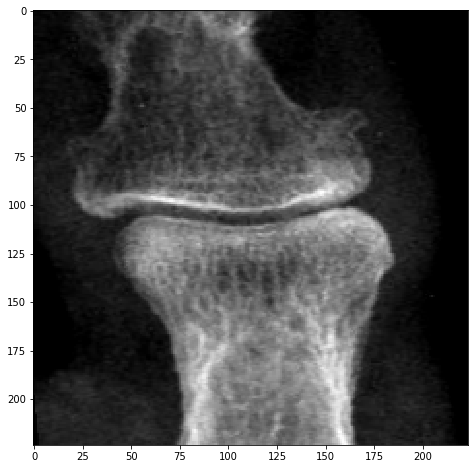

In [7]:
import matplotlib.pyplot as plt

for x, y in feet_joints.take(1):
    print(y[0])
    
    plt.figure(figsize = (8, 8))
    plt.imshow(x[0, :, :, 0], cmap="gray")
    plt.show()

In [3]:
from dataset.rsna_joint_dataset import rsna_joint_dataset

rsna_joint_dataset = rsna_joint_dataset(config).create_rsna_joints_dataset(val_split = False)

2020-02-26 21:29:58,245;WARNING - Missing permissions to create directory for caching!


tf.Tensor(
[150.   1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.], shape=(15,), dtype=float64)


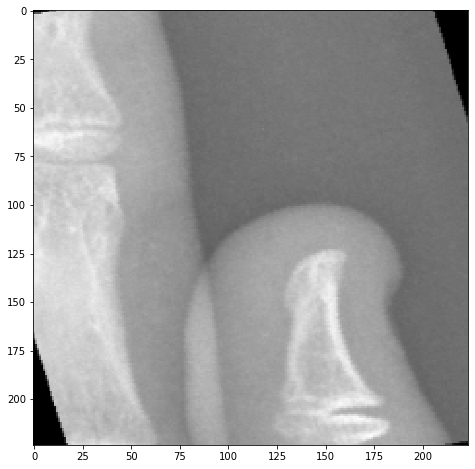

In [8]:
import matplotlib.pyplot as plt

for x, y in rsna_joint_dataset.take(1):
    print(y[0])
    
    plt.figure(figsize = (8, 8))
    plt.imshow(x[0, :, :, 0], cmap="gray")
    plt.show()

In [5]:
import tensorflow as tf
from model.utils.metrics import top_2_categorical_accuracy

dependencies = {
    'top_2_categorical_accuracy': top_2_categorical_accuracy
}

erosion_model = tf.keras.models.load_model('complex_rsna_pretrain_v1.h5', custom_objects=dependencies)

2020-02-28 14:05:06,429;WARNING - No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [7]:
import pandas as pd
import numpy as np

from dataset.ops import dataset_ops as ds_ops
from dataset.ops import joint_ops

AUTOTUNE = tf.data.experimental.AUTOTUNE

full_val_data = pd.read_csv('./data/predictions/feet_joint_data_test.csv')

full_val_data['flip'] = 'N'
flip_idx = ['-R' in image_name for image_name in full_val_data['image_name']]
flip_columns = full_val_data['flip'].values
flip_columns[flip_idx] = 'Y'
full_val_data['flip'] = flip_columns

full_val_data['file_type'] = 'jpg'

file_info = full_val_data[['image_name', 'file_type', 'flip', 'key']].values

outcome_column = 'narrowing_0' 
outcomes = full_val_data[outcome_column]
outcomes = pd.get_dummies(outcomes, columns = [outcome_column])

coords = full_val_data[['coord_x', 'coord_y']].values

full_val_dataset = tf.data.Dataset.from_tensor_slices((file_info, coords, outcomes.to_numpy(dtype = np.float64)))
full_val_dataset = joint_ops.load_joints(full_val_dataset, '../train')
# full_val_dataset = ds_ops.cache_dataset(full_val_dataset, True)
full_val_dataset = ds_ops.resize_images(full_val_dataset, 256, 128, update_labels = False, pad_resize = False) 
full_val_dataset = full_val_dataset.prefetch(buffer_size = AUTOTUNE)   

KeyError: "['key'] not in index"

In [8]:
import numpy as np

truths = np.array([], dtype = np.int32)
preds = np.array([], dtype = np.int32)
rmse_preds = np.array([], dtype = np.int32)

for x, y in feet_joints.take(1):
    y_pred = erosion_model.predict(tf.expand_dims(x, 0))
    
    rmse_pred = np.sum(y_pred * np.arange(5))
    
    y_pred = np.argmax(y_pred)
    
    truths = np.append(truths, np.argmax(y))
    preds = np.append(preds, y_pred)
    rmse_preds = np.append(rmse_preds, rmse_pred)

NameError: name 'feet_joints' is not defined

In [6]:
import numpy as np

from model.utils.metrics import softmax_rsme_metric

softmax_rmse = softmax_rsme_metric(np.array([0., 1.]))

In [10]:
import tensorflow as tf

softmax_rmse(np.array([[0., 1.], [1., 0.]], [[0., 1.], [0., 1.]], dtype = np.float32))

TypeError: data type not understood

In [8]:
import numpy as np
import tensorflow as tf 

import tensorflow.keras.backend as K

# x = np.array([[1., 0.], [1., 0.]])
# c = np.array([[1., 0.], [1., 0.]])

# x = K.sum(x * c, axis = 1)

In [18]:
x = np.array([[1., 0.], [1., 0.]])
x = tf.cast(K.argmax(x), dtype = tf.double)
y = tf.cast(K.argmax([[0., 1.], [1., 0.]]), dtype = tf.double)

idx = tf.where(tf.math.equal(1., y))

print(idx)

tf.Tensor([[0]], shape=(1, 1), dtype=int64)


In [19]:
x = tf.gather(x, idx)
y = tf.gather(y, idx)

print(x)
print(y)

tf.Tensor([[0.]], shape=(1, 1), dtype=float64)
tf.Tensor([[1.]], shape=(1, 1), dtype=float64)


In [34]:
tf.gather(y, idx)


<tf.Tensor: id=3026, shape=(2, 1), dtype=float64, numpy=
array([[1.],
       [1.]])>

In [33]:
print(y[idx])

InvalidArgumentError: Expected begin, end, and strides to be 1D equal size tensors, but got shapes [1,2,1], [1,2,1], and [1] instead. [Op:StridedSlice] name: strided_slice/

In [6]:
from sklearn.metrics import classification_report

print(classification_report(truths, preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       985
           1       0.00      0.00      0.00         2
           2       0.41      0.25      0.31        55
           3       0.33      0.12      0.17        34
           4       0.83      0.36      0.50        28

    accuracy                           0.90      1104
   macro avg       0.50      0.34      0.39      1104
weighted avg       0.88      0.90      0.88      1104



/home/stadlerm/Development/Programs/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
np.count_nonzero(truths == preds) / truths.size

0.9021739130434783

In [8]:
np.sqrt(np.mean(np.square(truths - preds)))

0.7848197429891193

In [9]:
np.sqrt(np.mean(np.square(truths - rmse_preds)))

0.7566249446001023

In [10]:
abs_e = np.absolute(truths - preds)

np.unique(abs_e, return_counts = True)

(array([0, 1, 2, 3, 4]), array([996,  15,  54,  25,  14]))